In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import math

from optimizers import RMSProp, AdamOptimizer, AdaDelta, Momentum
from numras import Numras

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop as KerasRMSProp

### Preprocessing the mnist dataset 

In [3]:
# pre processing data mnist dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
enc = OneHotEncoder(sparse=False, categories='auto')

X = trainX.reshape(trainX.shape[0], trainX.shape[1]*trainX.shape[2]).T
Y = trainY.reshape(-1, trainY.shape[0])
Y = enc.fit_transform(Y.reshape(-1,1)).T

test_x = testX.reshape(testX.shape[0], testX.shape[1]*testX.shape[2]).T
test_y = testY.reshape(-1, testY.shape[0])
test_y = enc.transform(test_y.reshape(-1, 1)).T

X = X / 255
test_x = test_x / 255

print(f"X shape - {X.shape}")
print(f"Y shape - {Y.shape}")
print(f"test_x shape - {test_x.shape}")
print(f"test_y shape - {test_y.shape}")

X shape - (784, 60000)
Y shape - (10, 60000)
test_x shape - (784, 10000)
test_y shape - (10, 10000)


### Visualization the given Dataset

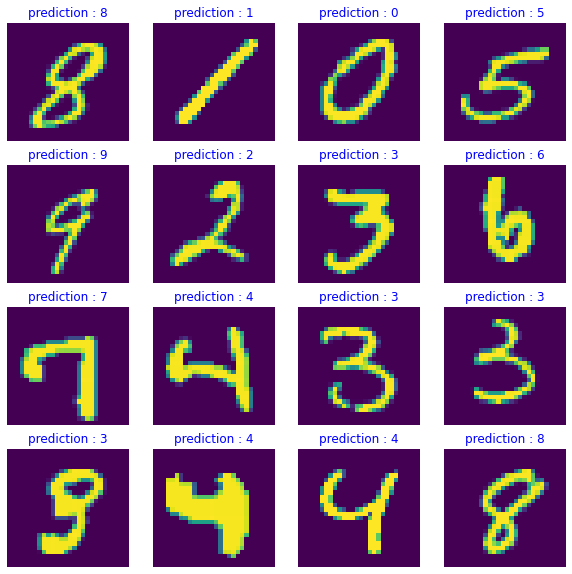

<Figure size 1600x1600 with 0 Axes>

In [34]:
ncols = 4
nrows = 4
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10,10))
n = 0
plt.figure(figsize=(20, 20), dpi=80)

permutation = list(np.random.permutation(X.shape[1]))
shuffled_X = X[:, permutation]
shuffled_Y = Y.argmax(axis=0)[permutation]

for i in range(nrows):
    for j in range(ncols):
        axs[i, j].set_axis_off()
        axs[i, j].set_title(f'prediction : {shuffled_Y[n]}', color="blue")
        axs[i, j].imshow((shuffled_X[:, n]).reshape(28, 28), aspect='auto')
        n += 1

### Initializing Optimizers Of NUMRAS

In [4]:
# optimizers
rms = RMSProp()
momentum = Momentum()
adam = AdamOptimizer()
adelta = AdaDelta()

### Comparing performance of KERAS and NUMRAS

#### ADAM Optimizer

In [27]:
# runner ADAM
# NUMRAS Nural Network
np.random.seed(0)
layers = [784, 64, 10] # Nural Network Architecture
activation = ["relu", "relu", "softmax"]
model = Numras(layers, activation, X.shape[0], optimizer=adam)
model.fit(X, Y, learning_rate=0.001, epoches=20, init_method="normal", mini_batch_size=1024, validation_set=(test_x, test_y))

[784, 784, 64, 10]
Epoch 1 Cost : 0.06278258492590523 Train Accracy : 84.685 Test Accuracy: 85.1
Epoch 2 Cost : 0.026570186373422844 Train Accracy : 93.92 Test Accuracy: 93.93
Epoch 3 Cost : 0.016774365709192596 Train Accracy : 95.825 Test Accuracy: 95.34
Epoch 4 Cost : 0.009356176308904 Train Accracy : 97.13333333333334 Test Accuracy: 96.41999999999999
Epoch 5 Cost : 0.01200493221622398 Train Accracy : 97.625 Test Accuracy: 96.83
Epoch 6 Cost : 0.010148722537958146 Train Accracy : 97.94500000000001 Test Accuracy: 96.96000000000001
Epoch 7 Cost : 0.007185583373188387 Train Accracy : 98.44666666666667 Test Accuracy: 97.31
Epoch 8 Cost : 0.004001584758056134 Train Accracy : 98.82166666666666 Test Accuracy: 97.48
Epoch 9 Cost : 0.003298931046344677 Train Accracy : 99.02166666666666 Test Accuracy: 97.68
Epoch 10 Cost : 0.0036769126935781928 Train Accracy : 99.165 Test Accuracy: 97.66
Epoch 11 Cost : 0.0027982260549608267 Train Accracy : 99.32166666666666 Test Accuracy: 97.63
Epoch 12 Cost 

In [28]:
model_k = Sequential()
model_k.add(Dense(784, input_dim=(784), activation='relu'))
model_k.add(Dense(64, activation='relu'))
model_k.add(Dense(10, activation='softmax'))
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
model_k.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [29]:
H = model_k.fit(X.T, Y.T, validation_data=(test_x.T, test_y.T), epochs=20, batch_size=1024, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 2s - loss: 0.4812 - accuracy: 0.8637 - val_loss: 0.2045 - val_accuracy: 0.9399
Epoch 2/20
60000/60000 - 1s - loss: 0.1716 - accuracy: 0.9507 - val_loss: 0.1365 - val_accuracy: 0.9596
Epoch 3/20
60000/60000 - 1s - loss: 0.1176 - accuracy: 0.9662 - val_loss: 0.1091 - val_accuracy: 0.9668
Epoch 4/20
60000/60000 - 1s - loss: 0.0862 - accuracy: 0.9755 - val_loss: 0.0938 - val_accuracy: 0.9714
Epoch 5/20
60000/60000 - 1s - loss: 0.0668 - accuracy: 0.9807 - val_loss: 0.0844 - val_accuracy: 0.9734
Epoch 6/20
60000/60000 - 1s - loss: 0.0529 - accuracy: 0.9849 - val_loss: 0.0785 - val_accuracy: 0.9741
Epoch 7/20
60000/60000 - 1s - loss: 0.0410 - accuracy: 0.9888 - val_loss: 0.0676 - val_accuracy: 0.9797
Epoch 8/20
60000/60000 - 1s - loss: 0.0335 - accuracy: 0.9911 - val_loss: 0.0690 - val_accuracy: 0.9789
Epoch 9/20
60000/60000 - 1s - loss: 0.0276 - accuracy: 0.9928 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 10/20
60

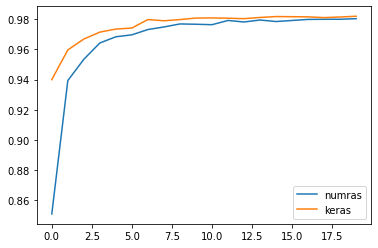

In [30]:
import seaborn as sns
sns.lineplot(y=model.history["test_acc"], x=range(20), label="numras")
sns.lineplot(y=H.history["val_accuracy"], x=range(20), label="keras")

In above graph validation set accuracy of Keras and Numras is compaired

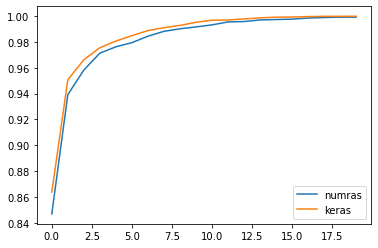

In [31]:
sns.lineplot(y=model.history["train_acc"], x=range(20), label="numras")
sns.lineplot(y=H.history["accuracy"], x=range(20), label="keras")

In above graph training set accuracy of Keras and Numras is compaired

#### RMSProp Optimizer

In [13]:
# runner RMSProp
# NUMRAS Nural Network
np.random.seed(0)
layers = [784, 64, 10]
activation = ["relu", "relu", "softmax"]
model = Numras(layers, activation, X.shape[0], optimizer=rms)
model.fit(X, Y, learning_rate=0.001, epoches=20, init_method="xavier", mini_batch_size=1024, validation_set=(test_x, test_y))

[784, 784, 64, 10]
Epoch 1 Cost : 0.47571962086082964 Train Accracy : 29.096666666666664 Test Accuracy: 29.12
Epoch 2 Cost : 0.12272999562165993 Train Accracy : 69.28666666666666 Test Accuracy: 69.01
Epoch 3 Cost : 0.04018748691541046 Train Accracy : 88.25166666666667 Test Accuracy: 88.71
Epoch 4 Cost : 0.026947064275155617 Train Accracy : 91.63833333333334 Test Accuracy: 91.75999999999999
Epoch 5 Cost : 0.02088797417024663 Train Accracy : 94.19999999999999 Test Accuracy: 94.11
Epoch 6 Cost : 0.017824254529140583 Train Accracy : 95.48166666666667 Test Accuracy: 95.19999999999999
Epoch 7 Cost : 0.01577250357843075 Train Accracy : 94.82666666666667 Test Accuracy: 94.35
Epoch 8 Cost : 0.00813503046117891 Train Accracy : 97.03 Test Accuracy: 96.41999999999999
Epoch 9 Cost : 0.006859797185283862 Train Accracy : 97.73166666666665 Test Accuracy: 96.95
Epoch 10 Cost : 0.007314472392222025 Train Accracy : 97.855 Test Accuracy: 96.95
Epoch 11 Cost : 0.00515356452868514 Train Accracy : 98.8633333

In [19]:
model_k = Sequential()
model_k.add(Dense(784, input_dim=(784), activation='relu'))
model_k.add(Dense(64, activation='relu'))
model_k.add(Dense(10, activation='softmax'))
opt = KerasRMSProp(learning_rate=0.001, rho=0.9)
model_k.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [20]:
H = model_k.fit(X.T, Y.T, validation_data=(test_x.T, test_y.T), epochs=20, batch_size=1024, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 2s - loss: 0.5332 - accuracy: 0.8398 - val_loss: 0.2756 - val_accuracy: 0.9180
Epoch 2/20
60000/60000 - 2s - loss: 0.2066 - accuracy: 0.9386 - val_loss: 0.1624 - val_accuracy: 0.9504
Epoch 3/20
60000/60000 - 2s - loss: 0.1377 - accuracy: 0.9586 - val_loss: 0.1971 - val_accuracy: 0.9345
Epoch 4/20
60000/60000 - 1s - loss: 0.1010 - accuracy: 0.9689 - val_loss: 0.1041 - val_accuracy: 0.9685
Epoch 5/20
60000/60000 - 1s - loss: 0.0785 - accuracy: 0.9763 - val_loss: 0.1178 - val_accuracy: 0.9645
Epoch 6/20
60000/60000 - 1s - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.0897 - val_accuracy: 0.9730
Epoch 7/20
60000/60000 - 1s - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.1016 - val_accuracy: 0.9662
Epoch 8/20
60000/60000 - 1s - loss: 0.0402 - accuracy: 0.9879 - val_loss: 0.0971 - val_accuracy: 0.9690
Epoch 9/20
60000/60000 - 1s - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.0732 - val_accuracy: 0.9771
Epoch 10/20
60

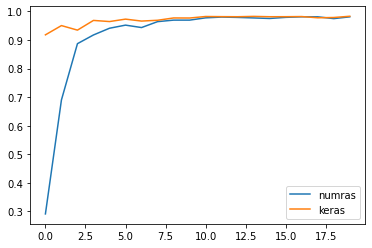

In [24]:
sns.lineplot(y=model.history["test_acc"], x=range(20), label="numras")
sns.lineplot(y=H.history["val_accuracy"], x=range(20), label="keras")

In above graph validation set accuracy of Keras and Numras is compaired

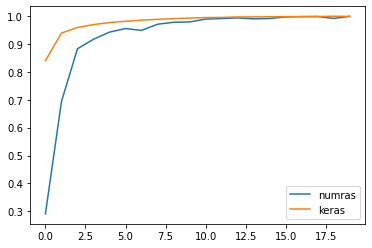

In [23]:
sns.lineplot(y=model.history["train_acc"], x=range(20), label="numras")
sns.lineplot(y=H.history["accuracy"], x=range(20), label="keras")

In above graph training set accuracy of Keras and Numras is compaired